# Data Science Smörgåsbord: Regression
### Kori Thompson
Please note this is an exercise to get used to using and interpreting regression models. Actual data science projects involve more intensive data cleaning, preprocessing, exploratory data analysis. Similalry, larger and more complex datasets are typically used for data science projects.

Regression algorithms are survised machine learning algorithms that seek to predict the value of a continious variable. These methods are generally used for predicting things like the cost of a taxi ride based on a set of input features. They are assessed using metrics such as the root mean squared error, the mean squared error, or mean absolute error. The one of the most commonly used regression algorithms and the easiest to interpret is linear regression. This exercise goes over linear regression and multiple linear regression. It demonstrates how to interpret the output of linear regression and how regularization is used. 

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
# dataset
from sklearn import datasets
# utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.model_selection import cross_val_score
# modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import statsmodels.api as sm
# data visulaization
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
diabetes = datasets.load_diabetes()
print(diabetes['DESCR'])

df = pd.DataFrame(data= diabetes['data'], columns= diabetes['feature_names'])

df['disease_progression'] = diabetes['target']


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Data Description

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


All the features share the same standard deviation and their values range from around -0.14 to 0.18, so it is likely that the features have already been scaled. As the data description mentions, the features have been mean centered and scaled.

In [12]:
df.skew()

age                   -0.231382
sex                    0.127385
bmi                    0.598148
bp                     0.290658
s1                     0.378108
s2                     0.436592
s3                     0.799255
s4                     0.735374
s5                     0.291754
s6                     0.207917
disease_progression    0.440563
dtype: float64

No feature has a skew value greater that +/- 2, implying that the skew of the data will not have a signficant impact on the performance of the model. As such no data transformation methods will be used to address the skew present in the features.

In [5]:
corrs = df.corr()

targetCor = corrs.drop('disease_progression')['disease_progression']

targetCor.loc[targetCor.abs().sort_values(ascending= False).index]

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s3    -0.394789
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
Name: disease_progression, dtype: float64

The feature that best predicts disease progression is BMI which has the highest correlation of the features at 0.58450. This implies that BMI more closely associated with disease progression than the other features.

## Linear Regression
Linear regression is a supervised machine learning algorithm, meaning it has a labeled dataset. The algorithm finds the linear relationship between an input feature and the target feature by fitting a line to the data. This uses a linear equation where the intercept is the expected value of the target variable when the input feature is equal to 0 and the slope is the expected increase or decrease in the target feature for every increase in the input feature.

In [3]:
xTrain, xTest, yTrain, yTest = train_test_split(df.bmi,df.disease_progression, test_size = 0.2, random_state=303)

In [4]:
model = LinearRegression()
model.fit(pd.DataFrame(xTrain), yTrain)

LinearRegression()

In [12]:
print(f'Calculated coefficient: {model.coef_[0]}')
print(f'Calculated intercept: {model.intercept_}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTest, model.predict(xTest.values.reshape(-1, 1))))}')

Calculated coefficient: 959.9937225664531
Calculated intercept: 150.99951033817558
RMSE: 71.39221437417817


c:\Users\kthomp82\Downloads\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Based on the calculated coefficient of the model, we can say that for every one unit of increase in the BMI will on average result in an increase of 152.733 unit increase in disease progression.

In [13]:
yTest.describe().T

count     89.000000
mean     159.741573
std       84.589319
min       42.000000
25%       77.000000
50%      144.000000
75%      235.000000
max      332.000000
Name: disease_progression, dtype: float64

The RMSE of the model is approximately 61.178 which is better than the 76.307 standard deviation of the data. This implies that the model's predictions vary from the target value less than the average variation of the target distribution.

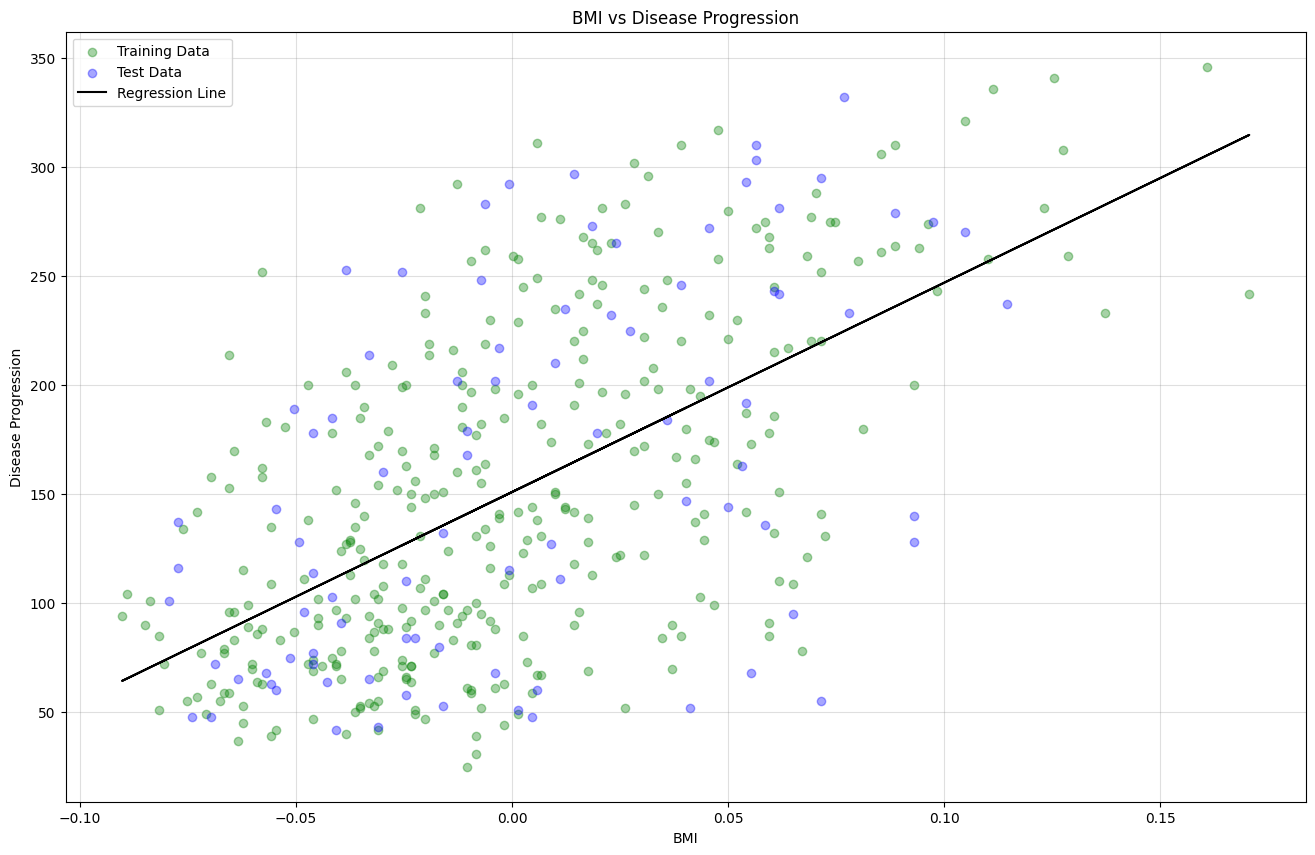

In [14]:
plt.figure(figsize=(16,10))
plt.scatter(x=xTrain, y=yTrain, color = 'green', alpha=0.35, label='Training Data')
plt.scatter(x=xTest, y=yTest, color = 'blue', alpha=0.35, label='Test Data')
plt.plot(xTrain, model.predict(pd.DataFrame(xTrain)), color = 'black', label= 'Regression Line')
plt.legend()
plt.title('BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.grid(which='major',axis='both', color='grey',alpha = 0.25)
plt.show()

As seen in the graph above, the model does a decent job of fitting a line to the data. Most points lie along the line, but tend to be disperased out from the line. Can we build a better model using all input features?

## Multiple Linear Regression
Multiple linear regression builds on the ideas of linear regression, by adding in additional coefficients to the linear equation for the best fit line. By adding in additional input features we can increse the capacity of the model to predict the target feature's value. Often models with more input features are able to explain more of the variance in the target feature's values as the line tends to be a better fit than that of a simple linear regression.

In [3]:
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(columns= ['disease_progression']),df.disease_progression, test_size = 0.2, random_state=303)

Since our dataset is relatively small, we fit the model using a five-fold cross validation to get a sense of the model's performance on the training data and validation data. The five-fold cross validation insures that we get a balanced look at the performance of the model.

In [18]:
linearReg = LinearRegression()
linearRegress_CV = cross_val_score(linearReg, xTrain, yTrain, cv = 5, scoring = 'neg_root_mean_squared_error')
print(f'RMSE output: {[float(-i) for i in linearRegress_CV]}\t Mean RMSE: {-np.mean(linearRegress_CV)}\tStandard Deviation of RSME: {np.std(linearRegress_CV)}')

RMSE output: [55.27106156683421, 54.71543647183013, 49.920524751700114, 51.529116257499346, 57.141963881643605]	 Mean RMSE: 53.715620585901476	Standard Deviation of RSME: 2.6207789071225034


In [17]:
yTrain.describe().T

count    353.000000
mean     150.215297
std       75.092512
min       25.000000
25%       88.000000
50%      139.000000
75%      201.000000
max      346.000000
Name: disease_progression, dtype: float64

The mean of the RMSE is significantly smaller than the standard deviation of the training target feature, implying that the model does a good job of predicting the target value.

## Interpreting Linear Regression
Linear regressions are one of the most interpretable machine learning algorithms. Due to the linear equation of the best fit line it is possible to clearly see the relationship between each input feature and the target feature. This allows you compare the size of the effects of each input feature on the target feature. You are also able to see which features are statistically significant to the analysis and which are not.

In [19]:
feature_matrix = sm.add_constant(xTrain, prepend=False)
model = sm.OLS(yTrain, feature_matrix)
reg = model.fit()
print(reg.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.514
Model:                             OLS   Adj. R-squared:                  0.500
Method:                  Least Squares   F-statistic:                     36.19
Date:                 Mon, 28 Apr 2025   Prob (F-statistic):           6.70e-48
Time:                         10:35:11   Log-Likelihood:                -1897.5
No. Observations:                  353   AIC:                             3817.
Df Residuals:                      342   BIC:                             3860.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -27.6723     66.095     -0.41

Based on the adjusted R-squared score, the model explains approxiately 50% of the variance seen in the target feature. In other words the model can explain the varianation in the actual target values only half of the time, the other half of the time the model cannot explain or predict the actual target feature. Looking at the p-values we can see that only 5 input features were statistically significant at the 0.01 significance level. This suggests that only those 5 input features significantly contributed to the predicts of the target feature. The most significant impact of the an input feature based on the coefficients was s1. For every one unit of increase in the s1 feature on average we would expect to see a -1195.41 unit decrease in disease progression. Similarly, for s5 on average we would expect to see a 834.91 unit increase in disease progression for every one unit of increase in the s5 feature. 

In [23]:
lr = LinearRegression()
lr.fit(xTrain,yTrain)
print(f'RMSE: {root_mean_squared_error(yTest, lr.predict(xTest))}')

RMSE: 59.68175880108184


The RMSE for of the test data is higher than that of the training data from the cross-validation, which implies that the model does not generalize as well to new data. This may suggest that the model is overfit to the training data. Is there a way to help prevent the model from overfitting?

## Regularization
Regularization adds a regularization term/penalty to the MSE which forces algorithm to not only fit data, but keep model weights as small as possible. The idea is to reduce how sensitive the model is to the training data by increasing the bias of the model resulting in lower variance of the model. There are three types of regularization, L1 or Lasso regression, L2 or Ridge regression, or the Elastic Net regression. The Elastic Net is a combination of L1 and L2 regularization. Lasso regression tends to eliminate the weights of the least significant features by decreasing the weights to 0. Ridge regression works similarly by shrinking the weights of the least significant features as close to 0 as possible. 

In [4]:
lasso = Lasso()

lasso.fit(xTrain, yTrain)

print(f'Training RMSE: {root_mean_squared_error(yTrain, lasso.predict(xTrain))}')
print(f'Test RMSE: {root_mean_squared_error(yTest, lasso.predict(xTest))}')

Training RMSE: 60.87539534608646
Test RMSE: 69.1889546276939


In [6]:
ridge = Ridge()

ridge.fit(xTrain, yTrain)

print(f'Training RMSE: {root_mean_squared_error(yTrain, ridge.predict(xTrain))}')
print(f'Test RMSE: {root_mean_squared_error(yTest, ridge.predict(xTest))}')

Training RMSE: 57.31805160631813
Test RMSE: 62.26742955071651


In [7]:
elastic = ElasticNet()

elastic.fit(xTrain, yTrain)

print(f'Training RMSE: {root_mean_squared_error(yTrain, elastic.predict(xTrain))}')
print(f'Test RMSE: {root_mean_squared_error(yTest, elastic.predict(xTest))}')

Training RMSE: 74.6954475288236
Test RMSE: 84.29872108385071


Of the three models, the ridge regression had the lowest RMSE without tuning the parameters. The ridge regression's RMSE was 62.267 which is still below the standard deviation of the test target variable, implying that the model still varies less than random chance. However, it still performs worse than the regular multiple linear regression model which had a lower RMSE. As such we would still select the multiple linear regression as the final model as it had the best performance in terms of RMSE so far.